In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
df=pd.read_csv('HR Employee data.csv')
df.head(10)

,EmployeeID,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,LeavingYear,Reason,RelievingStatus,office_code,JobLevel_updated
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,14,4,5,3,Yes,2019.0,long hours,Voluntary,BOS,L7
1,100001,2006,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,1,519,...,12,4,5,3,Yes,2018.0,medical issues,Voluntary,NYC,L6
2,100002,2006,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,1,1572,...,12,3,1,4,Yes,2018.0,retiring,Voluntary,OTT,L6
3,100003,2006,54,Travel_Rarely,215,Corporate Functions,19,Diploma,1,309,...,13,4,5,3,Yes,2019.0,career change,Voluntary,NYC,L7
4,100004,2007,57,Travel_Rarely,285,Marketing,2,Diploma,1,828,...,11,5,5,3,Yes,2018.0,retiring,Voluntary,CAL,L5
5,100005,2007,57,Travel_Rarely,224,Corporate Functions,21,Masters,1,223,...,14,4,5,3,Yes,2021.0,retiring,Voluntary,CAL,L7
6,100006,2007,50,Travel_Rarely,528,Corporate Functions,2,Diploma,1,1485,...,11,3,1,3,Yes,2018.0,retiring,Voluntary,OTT,L6
7,100007,2007,52,Travel_Rarely,590,Corporate Functions,2,Diploma,1,1563,...,11,3,1,3,Yes,2018.0,return to school,Voluntary,PHL,L6
8,100008,2007,58,Travel_Rarely,147,Delivery,23,Diploma,1,165,...,15,4,6,3,Yes,2022.0,Misconduct,Involuntary,BOS,L3
9,100009,2007,57,Travel_Rarely,305,Marketing,2,Masters,1,823,...,11,5,5,3,Yes,2018.0,long hours,Voluntary,NYC,L5


In [11]:
df.isnull().sum()

,0
EmployeeID,0
JoiningYear,0
Age,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13423 entries, 0 to 13422
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                13423 non-null  int64  
 1   JoiningYear               13423 non-null  int64  
 2   Age                       13423 non-null  int64  
 3   BusinessTravel            13423 non-null  object 
 4   DailyRate                 13423 non-null  int64  
 5   Department                13423 non-null  object 
 6   DistanceFromHome          13423 non-null  int64  
 7   EducationField            13423 non-null  object 
 8   EmployeeCount             13423 non-null  int64  
 9   EmployeeNumber            13423 non-null  int64  
 10  EnvironmentSatisfaction   13423 non-null  int64  
 11  Gender                    13423 non-null  object 
 12  HourlyRate                13423 non-null  int64  
 13  JobInvolvement            13423 non-null  int64  
 14  JobSat

In [13]:
df.describe()

,EmployeeID,JoiningYear,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,LeavingYear
count,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.0,13423.000000,13423.000000,13423.000000,13423.00000,...,13423.0,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,3198.000000
mean,106711.000000,2018.825300,36.159949,803.998287,8.881472,1.0,1022.222677,2.369366,65.498622,2.46316,...,80.0,0.500410,10.572227,2.454518,2.496908,2.791626,1.898979,1.396037,1.873501,2020.392120
std,3875.030667,2.005345,8.126696,356.968483,6.844715,0.0,549.883093,0.941861,17.196420,0.66039,...,0.0,0.664563,7.246988,1.069622,0.656888,1.860029,1.039347,0.818350,1.004282,1.420644
min,100000.000000,2005.000000,18.000000,102.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,...,80.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000
25%,103355.500000,2018.000000,30.000000,514.500000,3.000000,1.0,554.000000,2.000000,52.000000,2.00000,...,80.0,0.000000,6.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2019.000000
50%,106711.000000,2019.000000,35.000000,800.000000,7.000000,1.0,1014.000000,2.000000,65.000000,3.00000,...,80.0,0.000000,9.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2021.000000
75%,110066.500000,2020.000000,41.000000,1106.000000,13.000000,1.0,1493.000000,3.000000,79.000000,3.00000,...,80.0,1.000000,14.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2022.000000
max,113422.000000,2021.000000,60.000000,1499.000000,29.000000,1.0,2068.000000,4.000000,100.000000,4.00000,...,80.0,3.000000,40.000000,6.000000,4.000000,15.000000,7.000000,6.000000,6.000000,2022.000000


# -------- DROP UNNECESSARY COLUMNS -------- #

In [14]:
# Unique identifiers (no predictive value)
df.drop(['EmployeeID', 'EmployeeNumber'], axis=1, inplace=True)

# Constant columns (no variation, so no predictive power)
df.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

# Post-attrition information — known only AFTER the employee leaves (leads to data leakage)
df.drop(['LeavingYear', 'Reason', 'RelievingStatus'], axis=1, inplace=True)


# -------- ENCODE CATEGORICAL VARIABLES -------- #

In [16]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'MaritalStatus',
 'OverTime',
 'Attrition',
 'office_code',
 'JobLevel_updated']

In [17]:
# Remove target column from encoding list
categorical_cols.remove('Attrition')

In [18]:
# Encode each categorical feature using LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Encode the target column (Attrition: Yes=1, No=0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [19]:
df['Attrition']

,Attrition
0,1
1,1
2,1
3,1
4,1
...,...
13418,0
13419,0
13420,0
13421,0


# -------- SPLIT FEATURES & TARGET -------- #

In [20]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -------- RANDOM FOREST MODEL -------- #

In [22]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [23]:
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Stayed', 'Left']

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)

    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

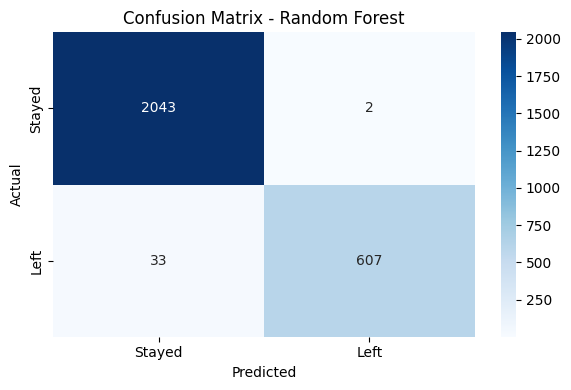

In [29]:
# For default model
plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix - Random Forest")

In [30]:
print("\n Random Forest Performance:")
print(classification_report(y_test, y_pred))


 Random Forest Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2045
           1       1.00      0.95      0.97       640

    accuracy                           0.99      2685
   macro avg       0.99      0.97      0.98      2685
weighted avg       0.99      0.99      0.99      2685



# -------- FEATURE IMPORTANCE VISUALIZATION -------- #

<ipython-input-28-ad0e12b6ea26>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10], palette="viridis")


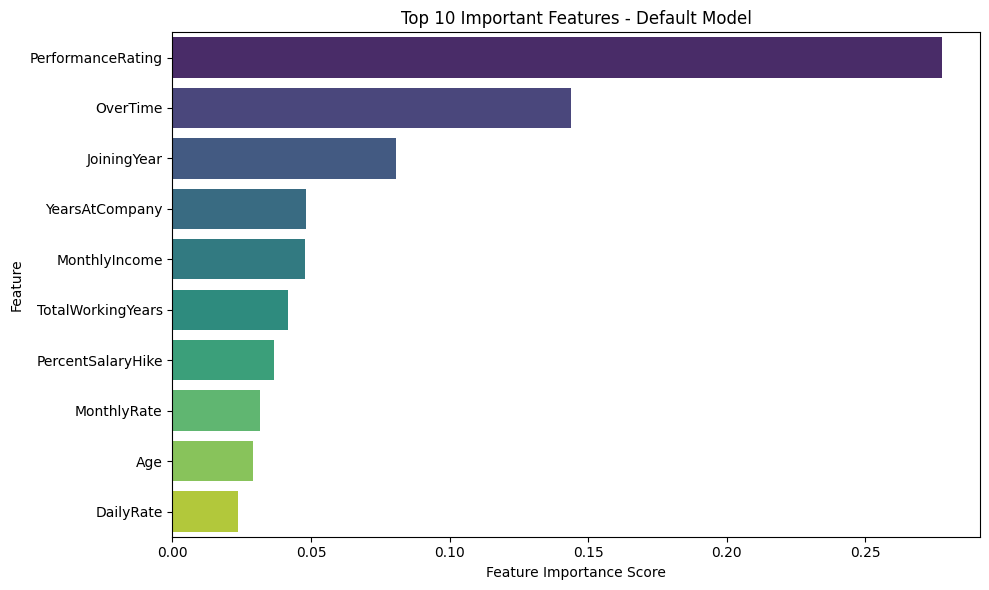

In [28]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10], palette="viridis")
plt.title("Top 10 Important Features - Default Model")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()